In [1]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import permutations
import networkx as nx
from scipy.sparse.linalg import eigsh
from sklearn.cluster import KMeans
from sklearn.datasets import fetch_california_housing
from matplotlib import colors
import random
from typing import List
plt.rcParams['figure.figsize'] = [7,7]

#### Simulation Exercise #1

In [2]:
def log_likelihood(F, A):

    log_likelihood=0
    

    for u in range(len(A)):
        for v in range(len(A)):
            zarb=0
            for i in range(len(F[0])):
                zarb = zarb * np.exp(-1*F[u][i]*F[v][i])
            log_likelihood =log_likelihood + np.log10(A[u][v]+((-1)**(A[u][v]))*zarb)

    return log_likelihood



In [3]:
def gradient(F, A, i):
    #todo gradient of log_likelihood respect to person i parameters (F_ic)
    gradient=[0]*len(A)
    sumG=0 
    
    for h in range(len(A)):
        
        zarb=0
        pel=0
        for J in range(len(F[0])):
            zarb = zarb * np.exp(-1*F[i][J]*F[h][J])
            pel = pel + -1*F[h][J]
        a = pel * ((-1)**(A[i][h])) * zarb / ( A[i][h]+((-1)**(A[i][h]))*zarb )

        gradient[h]= a
        sumG = sumG + gradient[h]
    
    return sumG

In [4]:
def train(A, C, iterations = 200):
    # initialize an F
    N = A.shape[0]
    F = np.random.rand(N,C)

    for n in range(iterations):
        for person in range(N):
            grad = gradient(F, A, person)
            F[person] += 0.005*grad # updating F
            F[person] = np.maximum(0.001, F[person]) # F should be nonnegative
        ll = log_likelihood(F, A)
        print('At step %4i logliklihood is %5.4f'%(n,ll))

    return F

<ipython-input-3-ef4d4cbba460>:13: RuntimeWarning: invalid value encountered in double_scalars
  a = pel * ((-1)**(A[i][h])) * zarb / ( A[i][h]+((-1)**(A[i][h]))*zarb )
<ipython-input-2-e7f9e18139f3>:11: RuntimeWarning: invalid value encountered in double_scalars
  log_likelihood =log_likelihood + np.log10(A[u][v]+((-1)**(A[u][v]))*zarb)


At step    0 logliklihood is   nan
At step    1 logliklihood is   nan
At step    2 logliklihood is   nan
At step    3 logliklihood is   nan
At step    4 logliklihood is   nan
At step    5 logliklihood is   nan
At step    6 logliklihood is   nan
At step    7 logliklihood is   nan
At step    8 logliklihood is   nan
At step    9 logliklihood is   nan
At step   10 logliklihood is   nan
At step   11 logliklihood is   nan
At step   12 logliklihood is   nan
At step   13 logliklihood is   nan
At step   14 logliklihood is   nan
At step   15 logliklihood is   nan
At step   16 logliklihood is   nan
At step   17 logliklihood is   nan
At step   18 logliklihood is   nan
At step   19 logliklihood is   nan
At step   20 logliklihood is   nan
At step   21 logliklihood is   nan
At step   22 logliklihood is   nan
At step   23 logliklihood is   nan
At step   24 logliklihood is   nan
At step   25 logliklihood is   nan
At step   26 logliklihood is   nan
At step   27 logliklihood is   nan
At step   28 loglikl

AttributeError: ignored

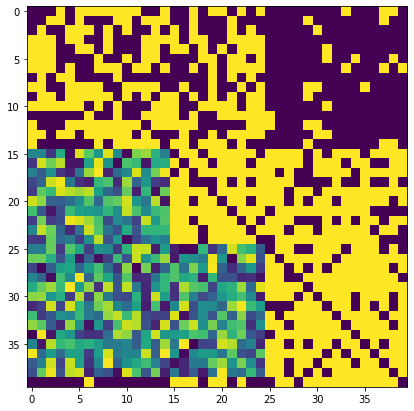

In [5]:
#testing in two small groups
A=np.random.rand(40,40)
A[0:15,0:25]=A[0:15,0:25]>1- 0.6 # connection prob people with 1 common group
A[0:15,25:40]=A[0:15,25:40]>1-0.1 # connection prob people with no common group
A[15:40,25:40]=A[15:40,25:40]>1-0.7 # connection prob people with 1 common group
A[15:25,15:25]=A[15:25,15:25]>1-0.8 # connection prob people with 2 common group
for i in range(40):
    A[i,i]=0
for j in range(i):
    A[i,j]=A[j,i]

plt.imshow(A)
delta=np.sqrt(-np.log(1-0.1)) # epsilon=0.1
F=train(A, 2, iterations = 120)
print(F>delta)
G=nx.from_numpy_matrix(A)
C=F>delta # groups members
nx.draw(G,node_color=10*(C[:,0])+20*(C[:,1]))

#### Simulation Exercise #2

In [ ]:
def AMatrix (Z=[3, 1, 2, 1, 3, 1, 2, 2, 2, 3, 3, 2, 1, 1, 3], p=0.6, q=0.1):
    A=np.zeros([len(Z), len(Z)])
    for i in range(len(Z)):
        A[i][i]=1;
        for j in range(i):
            if(Z[i]==Z[j]):
                A[i][j]=int(np.random.binomial(1, p, size=1))
            else:
                A[i][j]=int(np.random.binomial(1, q, size=1))
            A[j][i]=A[i][j]
    return A

In [ ]:
#Driver Program for SE2
for i in range(10):
    print(AMatrix())

[[1. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0.]
 [0. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0.]
 [1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1.]
 [1. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0.]
 [0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0.]
 [1. 1. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 1.]
 [0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 1. 0. 0. 1. 0.]
 [0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1.]]
[[1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 1. 0.]
 [0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1.]
 [0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1

#### Simulation Exercise #3

[[1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1.]
 [1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0.]
 [1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 1. 0. 1. 1.]
 [0. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 1. 0. 0. 1. 1.]
 [1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 1. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 1. 1. 0.]
 [1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 0. 0. 1. 1. 0.]
 [1. 0. 0. 0. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 1.]]


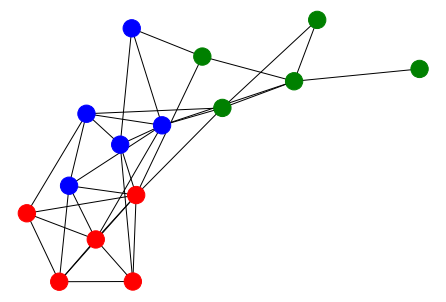

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
Z=[3, 1, 2, 1, 3, 1, 2, 2, 2, 3, 3, 2, 1, 1, 3]
n=len(Z)
p=0.6
q=0.1
A=AMatrix()
print(A)
G=nx.Graph()
tables=['red', 'green', 'blue']
colors=['']*n
for i in range(n):
    G.add_node(i)
    colors[i]= tables[Z[i]-1]
for i in range(n):
    for j in range(i):
        if(i!=j and A[i][j]==1):
            G.add_edge(i, j)
#print(G.nodes)
#print(G.edges)
#print(colors)
nx.draw(G, node_color=colors)
plt.show()

#### Simulation Exercise #4

In [ ]:
def HammingDistance (z1, z2):
    sum=0
    for i in range (0, len(z2)):
        if (z1[i]!=z2[i]):
            sum+=1
    return sum

In [ ]:
#Driver Program for SE4
Z1= input()
Z2= input()
z1=np.fromstring(Z1, dtype=int, sep=' ')
z2=np.fromstring(Z2, dtype=int, sep=' ')
print(HammingDistance(z1, z2))

1 2 3 4
4 3 2 1
4


#### Simulation Exercise #5

In [ ]:
def MinHammingDistance (z1, z2):
    sum=len(z1)
    p=permutations([1, 2, 3])
    for q in p:
        Z=np.copy(z2)
        for i in range(len(z2)):
            if (z2[i]==1):
                Z[i]=q[0]
            elif (z2[i]==2):
                Z[i]=q[1]
            elif (z2[i]==3):
                Z[i]=q[2]
        a=HammingDistance(z1, Z)
        if (a<sum):
            sum=a
    return sum

In [ ]:
#Driver Program for SE5
Z1= input()
Z2= input()
z1=np.fromstring(Z1, dtype=int, sep=' ')
z2=np.fromstring(Z2, dtype=int, sep=' ')
print(MinHammingDistance(z1, z2))

1 2 2 3 3
2 1 1 3 3
0


#### Simulation Exercise #6

In [ ]:
def logML (A, z, p=0.6, q=0.1):
    n=len(z)
    prob=1
    for i in range(n):
        for j in range(i):
            if (i!=j):
                if (z[i]==z[j]):
                    if (A[i][j]==0):
                        prob*=1-p
                    else:
                        prob*=p
                else:
                    if (A[i][j]==0):
                        prob*=1-q
                    else:
                        prob*=q
    prob= -np.math.log10(prob)
    return prob

#### Simulation Exercise #7

In [ ]:
def algorithm (A, z0, zo):
    T=15
    L=np.zeros(T+1)
    L[0]=logML(A, z0)
    d=np.zeros(T+1)
    z=np.copy(z0)
    Z=np.copy(z0)
    for i in range(T):
        dl=L[i]
        indx=i
        for j in range(15):
            if (j!=i):
                temp=np.copy(z[j])
                z[j]=np.copy(z[i])
                z[i]=np.copy(temp)
                ml=logML(A, z)
                if (dl>ml):
                    dl=ml
                    indx=j
                z=np.copy(Z)
        if (indx!=i):
            temp=np.copy(z[indx])
            z[indx]=np.copy(z[i])
            z[i]=np.copy(temp)
            Z=np.copy(z)
        L[i+1]=logML(A, Z)
        d[i+1]=MinHammingDistance(Z, zo)
    L=np.delete(L, 0)
    d=np.delete(d, 0)
    return Z, L, d

[3 1 2 1 3 1 2 2 2 3 3 2 1 1 3]


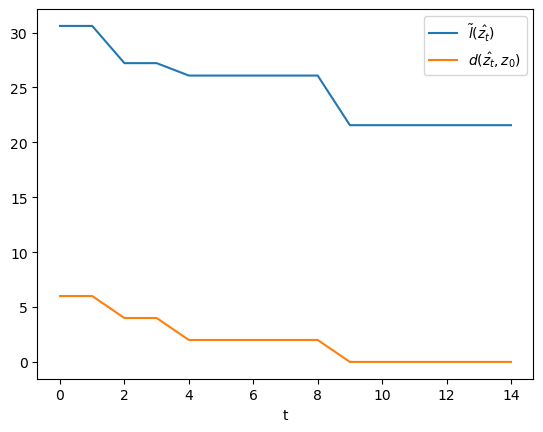

In [ ]:
#Driver Program for SE7
zo=[3, 1, 2, 1, 3, 1, 2, 2, 2, 3, 3, 2, 1, 1, 3]
A=AMatrix(Z=zo)

z0=[1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3]
Z, L, d=algorithm(A, z0, zo)
print(Z)
plt.plot(range(15), L, d)
plt.legend([r'$\tilde{l} (\hat{z_t})$', r'$d (\hat{z_t}, z_0)$'])
plt.xlabel('t')
plt.show()

#### Simulation Exercise #8

In [ ]:
zo=[3, 1, 2, 1, 3, 1, 2, 2, 2, 3, 3, 2, 1, 1, 3]
A=AMatrix(Z=zo)
z0=[1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3]
Z, l, d=algorithm(A, z0, zo)
L= l[14]
D=d[14]
for i in range(1, 10):
    p=np.random.permutation(z0)
    z, l, d= algorithm(A, p, zo) 
    Z=np.vstack((Z,z))
    L=np.append(L, l[14])
    D=np.append(D, d[14])
print(Z)
print(D)

[[3 1 2 1 3 1 2 2 2 3 3 2 1 1 3]
 [3 2 3 2 1 1 3 2 3 1 1 3 2 2 1]
 [1 3 2 3 1 3 2 2 2 1 1 2 3 3 1]
 [3 2 1 2 3 2 1 1 1 3 3 1 2 2 3]
 [3 1 2 1 3 1 2 2 2 3 3 2 1 1 3]
 [3 2 3 2 1 1 3 2 3 1 1 3 2 2 1]
 [1 3 2 3 3 1 2 2 2 1 1 2 3 3 1]
 [2 1 3 1 2 3 3 1 3 2 2 3 1 1 2]
 [2 1 1 3 2 1 3 3 3 2 2 3 1 1 2]
 [2 3 1 3 2 3 1 1 1 2 2 1 3 3 2]]
[0. 3. 0. 0. 0. 3. 2. 2. 2. 0.]


#### Simulation Exercise #9 & 10

For j=0, 2, 3, 5,  l(zT) is equal to l(z0) and the minimum Hamming Distance is 3.0, 3.0, 2.0, 3.0


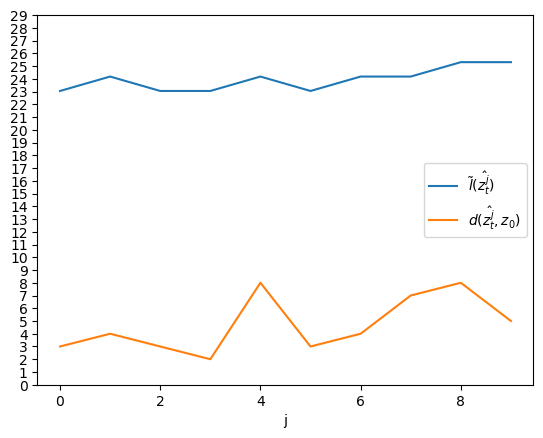

In [ ]:
j=''
dis=''
lzo=logML(A, zo)
for i in range(10):
    if (L[i]==lzo):
        j=j+str(i)+', '
        dis=dis+str(D[i])+', '
if (len(j)>1):
    print("For j="+ j +" l(zT) is equal to l(z0) and the minimum Hamming Distance is "+ dis[:len(dis)-2])
else:
    print("l(zT) was not equal to l(z0) for any j")
plt.plot(range(10), L, D)
plt.yticks(np.arange(0, 30, 1)) 
plt.xlabel('j')
plt.legend([r'$\tilde{l} (\hat{z_t^j})$', r'$d (\hat{z_t^j}, z_0)$'])
plt.show()

#### Simulation Exercise #11

In [ ]:
zo=[3, 1, 2, 1, 3, 1, 2, 2, 2, 3, 3, 2, 1, 1, 3]
A1=AMatrix(Z=zo)
A2=AMatrix(Z=zo)
z0=[1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3]
Z1, l1, d1=algorithm(A1, z0, zo)
L1=l1[14]
D1=d1[14]
for i in range(1, 10):
    p=np.random.permutation(z0)
    z, l, d= algorithm(A, p, zo) 
    Z1=np.vstack((Z1,z))
    L1=np.append(L1, l[14])
    D1=np.append(D1, d[14])
print(Z1)

Z2, l2, d2=algorithm(A2, z0, zo)
L2=l2[14]
D2=d2[14]
for i in range(1, 10):
    p=np.random.permutation(z0)
    z, l, d= algorithm(A2, p, zo) 
    Z2=np.vstack((Z2,z))
    L2=np.append(L2, l[14])
    D2=np.append(D2, d[14])
print(Z2)

print('For the first sample')
if zo in Z1.tolist():
    print('I found the original zo!!!\n Z=')
    print(zo)
elif 0 in D1:
    print('The best approximates with a minimum hamming distance of zero:\n')
    for i in range (10):
        if (D1[i]==0):
            print (Z1[i])
else:
    print('The best approximates with minimum hamming distance of:'+str(np.amin(D1)))
    for i in range (10):
        if (D1[i]==np.amin(D1)):
            print (Z1[i])
print("\n")
print('For the second sample:')
if zo in Z2.tolist():
    print('I found the original zo!!!\n Z=')
    print(zo)
elif 0 in D2:
    print('The best approximates with a minimum hamming distance of zero:\n')
    for i in range (10):
        if (D2[i]==0):
            print (Z2[i])
else:
    print('The best approximates with minimum hamming distance of:'+str(np.amin(D2)))
    for i in range (10):
        if (D2[i]==np.amin(D2)):
            print (Z2[i])
        

[[2 1 2 1 3 1 2 2 3 2 3 3 1 1 3]
 [3 1 2 1 3 1 2 2 2 3 3 2 1 1 3]
 [2 1 3 1 2 1 3 3 3 2 2 3 1 1 2]
 [1 1 2 3 1 3 3 2 2 1 2 2 3 3 1]
 [1 3 2 3 1 1 3 2 2 1 2 2 3 3 1]
 [3 2 1 2 1 2 1 3 1 3 3 3 2 2 1]
 [3 1 3 2 2 2 1 1 1 3 3 3 1 2 2]
 [2 3 1 2 3 2 3 1 3 1 1 1 2 2 3]
 [3 2 1 2 3 3 2 1 1 3 1 1 2 2 3]
 [2 1 3 1 2 2 1 3 1 3 3 3 1 2 2]]
[[3 1 2 1 3 1 2 2 2 3 3 2 1 1 3]
 [2 1 1 1 2 2 3 3 1 3 2 1 3 3 2]
 [3 1 2 1 3 3 1 2 1 2 3 1 2 2 3]
 [2 1 3 1 2 2 3 1 3 3 2 3 1 1 2]
 [1 2 3 2 1 2 3 3 3 1 1 3 2 2 1]
 [1 2 2 2 1 1 3 3 3 2 1 2 3 3 1]
 [3 1 2 1 3 3 2 1 2 2 3 2 1 1 3]
 [3 2 1 2 3 2 1 2 1 3 3 1 1 2 3]
 [3 1 2 1 3 1 3 1 2 2 3 2 2 1 3]
 [2 3 1 3 2 3 1 1 1 2 2 1 3 3 2]]
For the first sample
I found the original zo!!!
 Z=
[3, 1, 2, 1, 3, 1, 2, 2, 2, 3, 3, 2, 1, 1, 3]


For the second sample:
I found the original zo!!!
 Z=
[3, 1, 2, 1, 3, 1, 2, 2, 2, 3, 3, 2, 1, 1, 3]


#### Simulation Exercise #12

In [ ]:
def Specteral_Clustering(q,p,n):
    X = np.random.randint(2 , size=n)
    A = np.zeros(shape=(n,n))
    W = np.zeros(shape=(n,n))+p
    for i in range(n-1):
        for j in range(i+1,n):
            if X[i]==X[j]:
                if np.random.random(1)[0]<p:
                    A[i][j]=A[j][i]=1
            else:
                if np.random.random(1)[0]<q:
                    A[i][j]=A[j][i]=1
                W[i][j]=W[j][i]=q
    DW = np.eye(n)
    DA = np.eye(n)
    SumA = A.sum(axis=1)
    SumW = W.sum(axis=1)
    for i in range(n):
        DA[i][i] = SumA[i]
        DW[i][i] = SumW[i]
    LA = DA - A
    LW = DW - W

    fig, axs = plt.subplots(2 , figsize=(8, 10))
    
    #UA, SA, VA = np.linalg.svd(LA, full_matrices=False)
    #u1 = UA[:,-1]
    #u2 = UA[:,-2]
    
    evals_large, evecs_large = eigsh(LA, which='SM')
    u1 = evecs_large[:,0]
    u2 = evecs_large[:,1]
    
    axs[0].plot(u1[X>0],u2[X>0],'bo',markersize=1.5)
    axs[0].plot(u1[X==0],u2[X==0],'ro',markersize=1.5)
    axs[0].set_title('n=' + str(n)+str(' given A matrix'))
    
    #UW, SW, VW = np.linalg.svd(LW, full_matrices=False)
    #u1 = UW[:,-1]
    #u2 = UW[:,-2]
    evals_large, evecs_large = eigsh(LW, which='SM')
    u1 = evecs_large[:,0]
    u2 = evecs_large[:,1]

    axs[1].plot(u1[X>0],u2[X>0],'bo',markersize=1.5)
    axs[1].plot(u1[X==0],u2[X==0],'ro',markersize=1.5)
    axs[1].set_title('n=' + str(n)+str(' given W matrix'))
    plt.savefig('n='+str(n)+' sp-c.png')

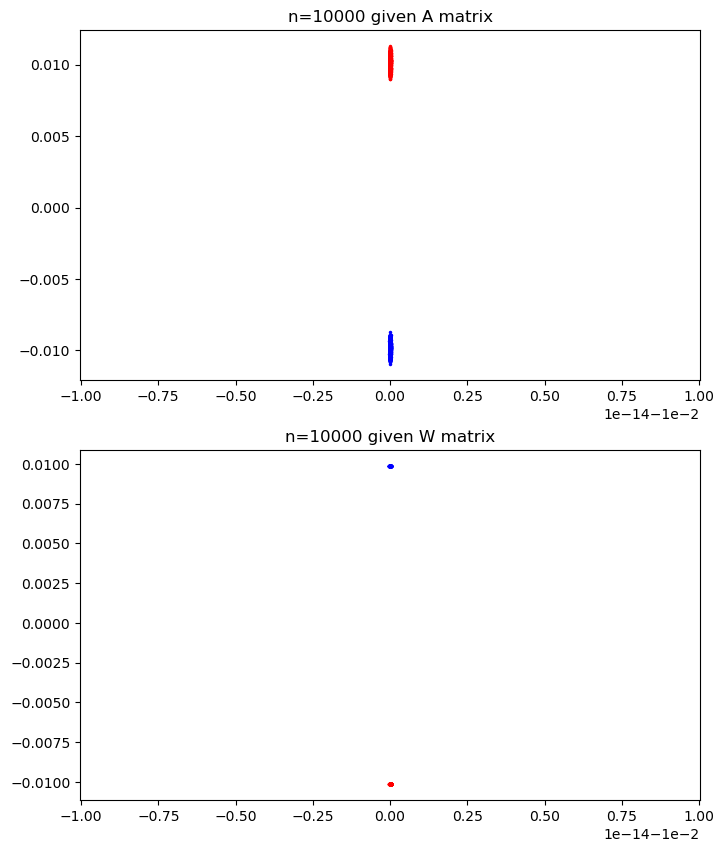

In [ ]:
Specteral_Clustering(0.01,0.1,10000)

#### Simulation Exercise #13

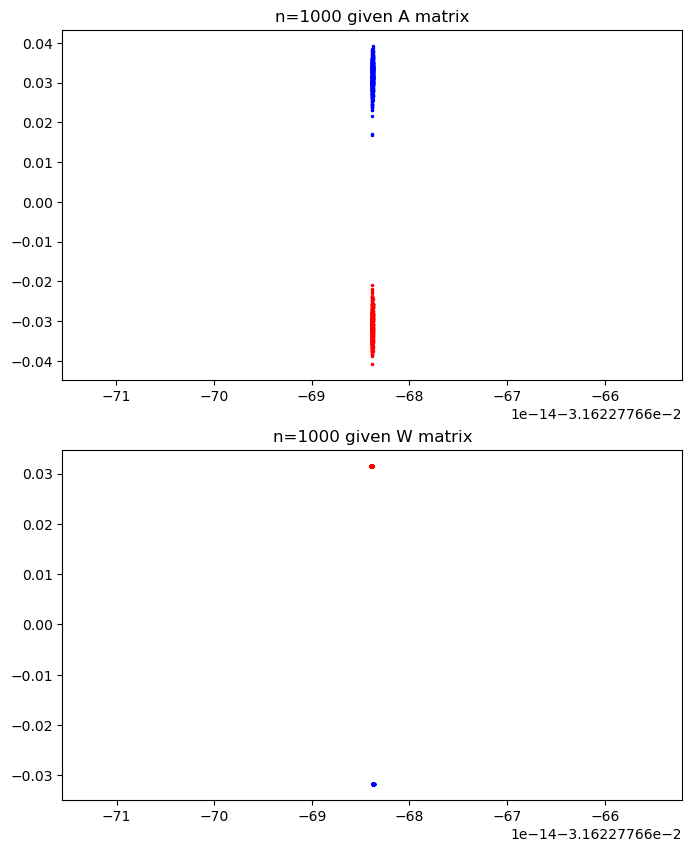

In [ ]:
Specteral_Clustering(0.01,0.1,1000)

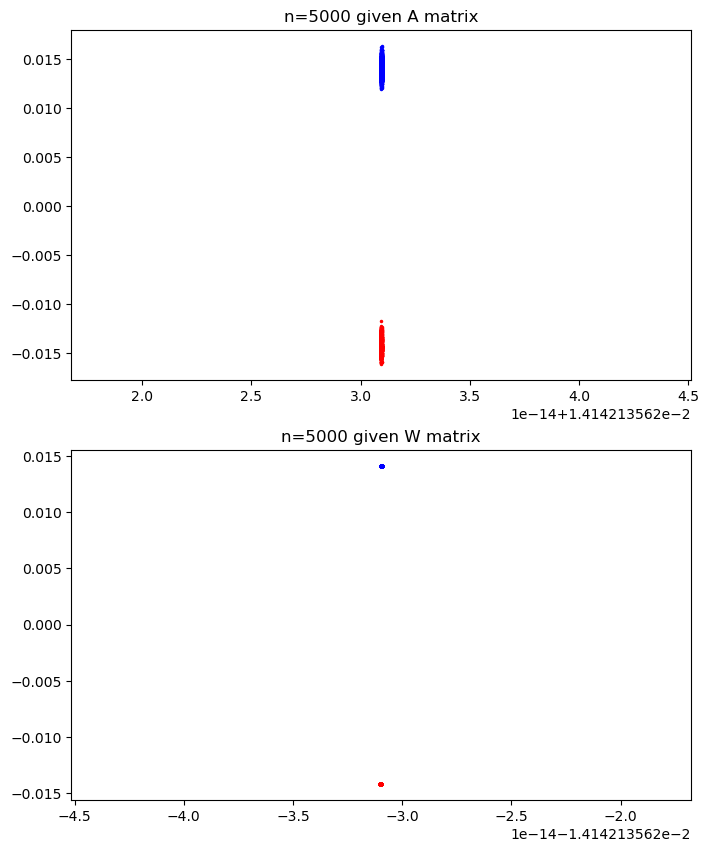

In [ ]:
Specteral_Clustering(0.01,0.1,5000)

#### Simulation Exercise #14

In [7]:
def spec(M,k=2):
    #M is adjacency matrix
    D = np.diag(np.sum(M, axis=1))
    L = D - M
    eigen_values, eigen_vectors = np.linalg.eig(L)
    i = np.where(eigen_values < 0.5)
    U = np.array(eigen_vectors[:, i[0]])
    model = KMeans(init='k-means++', n_clusters=k)
    model.fit(U)
    # Inertia: Sum of distances of samples to their closest cluster center
    return model

def make_matrixes(n,G):
    p = 0.1
    q = 0.01
    
    W = nx.to_numpy_array(G)
    A = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            if W[i, j] == 0:
                A[i, j] = q
            else:
                A[i, j] = p
    return W,A


first just showing with 2 attributes

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


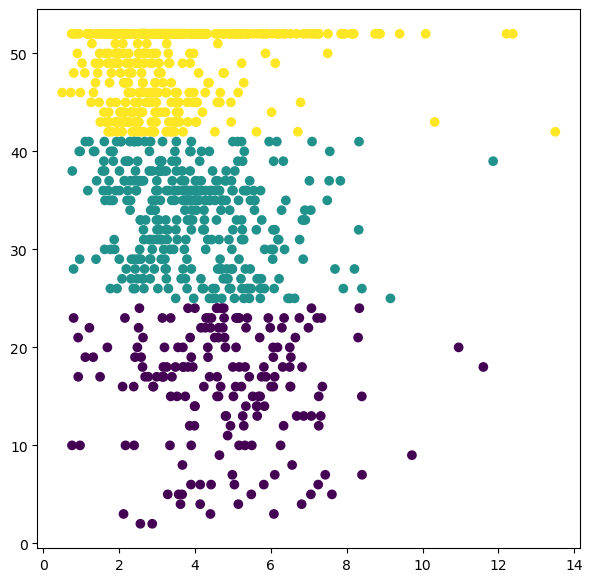

In [ ]:
california_housing = fetch_california_housing(as_frame=True)
U = california_housing.frame[['MedInc','HouseAge']][:1000]
kmeans = KMeans(n_clusters=3)
U["Cluster"] = kmeans.fit_predict(U)
U["Cluster"] = U["Cluster"].astype("category")
U.head()
plt.scatter(U['MedInc'],U['HouseAge'],c=U['Cluster'] )
plt.show()

create distance matrix

In [ ]:
n=1000
U = california_housing.frame['MedInc'][:n]
d=np.zeros((n,n))
for i in range(n):
    for j in range(n):
        d[i,j]=abs(U[i]-U[j])

show map of matrix D

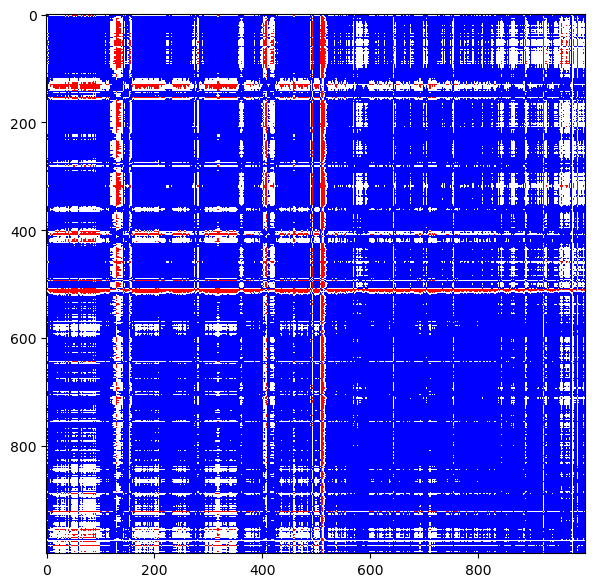

In [ ]:
cmap = colors.ListedColormap(['blue', 'white','red'])
min=d.min()
max=d.max()
bounds=[min,max*2/9,max*2/5,max]
norm = colors.BoundaryNorm(bounds, cmap.N)
plt.imshow(d,cmap=cmap, norm=norm)
plt.show()

#### Simulation Exercise #15

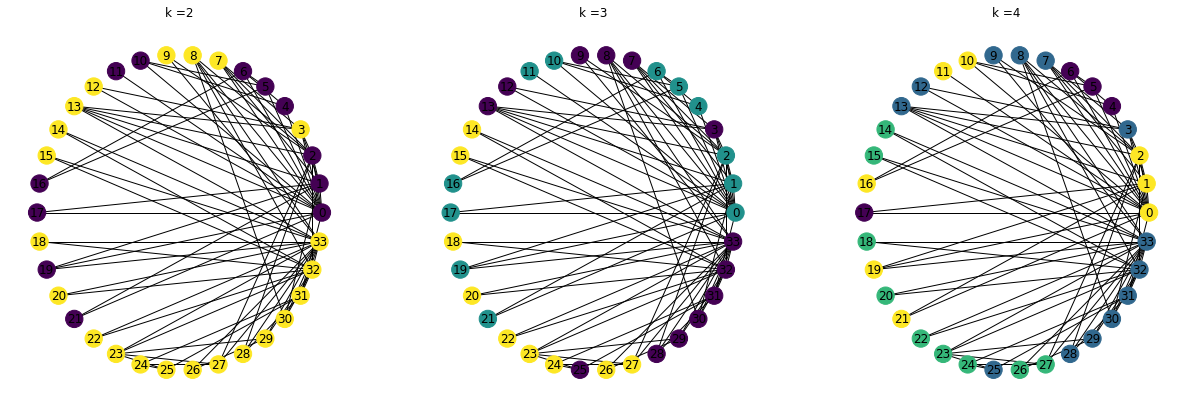

In [8]:
G2 = nx.karate_club_graph()
n = len(G2.nodes)
plt.rcParams['figure.figsize'] = [21,7]
for i in range(3):
    W,A=make_matrixes(n,G2)
    model = spec(W,k=i+2)
    plt.subplot(1, 3, i+1)
    plt.title(f'k ={i+2}')
    nx.draw_circular(G2,node_color=model.labels_,with_labels=True)
plt.show()

#### Simulation Exercise #16

#### Simulation Exercise #17

In [ ]:
n=1000
m=3000
p=0.0034
al=(n*(n-1))/2
edges=np.random.binomial(al, p, 10)
print(edges)
avg=edges.mean()
error=abs(avg-m)/m *100
if (error<=5):
    print('The mean of the number of edges %s and it is equal to m with %s percent error.'%(avg, error))
else:
    print('The error is %s and the mean is not equal to m.'%(error))

[1676 1775 1705 1718 1674 1714 1689 1696 1754 1745]
The error is 42.84666666666667 and the mean is not equal to m.


#### Simulation Exercise #18

The average number of "Same Color(?)" people is 3.5


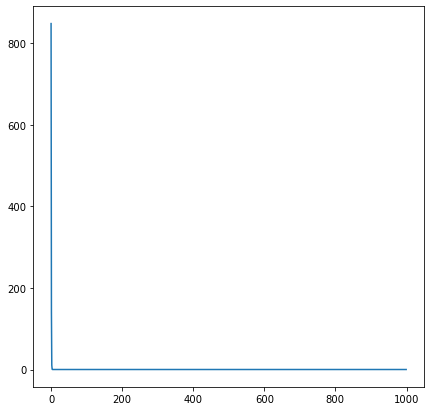

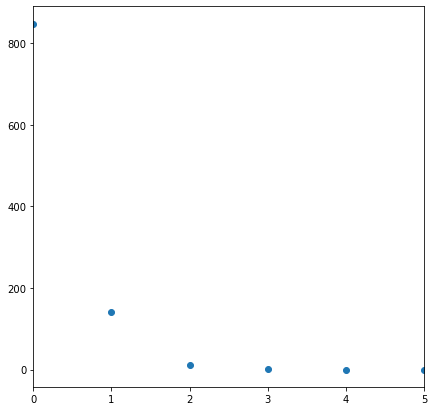

In [ ]:
def MatrixMaker(n=1000, p=0.00016):
    A=np.zeros((n, n))
    for i in range (n):
        for j in range(i):
            A[i][j]=np.random.binomial(1, p)
            A[j][i]=A[i][j]
    return A
n=1000
p=0.00016
P=np.zeros((10, n))
count=np.zeros(10)
for i in range(10):
    A=MatrixMaker()
    #the number of people with the same taste for each person, or the number of edges for each node:
    taste=np.zeros(n, dtype=int)
    #the number of people having i people of the same taste, or the number of nodes with i edges:
    person=np.zeros(n)
    for j in range(n):
        taste[j]=np.sum(A[j])
        person[taste[j]]+=1
    L=np.mean(taste)
    count[i]+=np.sum([1 if a>L else 0 for a in person])
    P[i]=person
aver=np.mean(count)
print('The average number of "Same Color(?)" people is %s'%aver)
x=np.linspace(0, n-1, n)
y=np.mean(P, axis=0)
fig=plt.figure()
plt.plot(x, y)
fig2=plt.figure()
plt.scatter(x, y)
plt.xlim([0, 5])
plt.show()

#### Simulation Exercise #19

In [ ]:
N=5
n=3000
p=0.01
T=np.zeros(N, dtype=int)
Z=np.zeros(N, dtype=int)
for i in range(N):
    A=MatrixMaker(n=n, p=p)
    for j in range(n-2):
        for k in range(j+1, n):
            if(A[j][k]==1):
                for t in range(k+1, n):
                    if(A[j][t]==1):
                        if(A[k][t]==1):
                            T[i]+=1
                        else:
                            Z[i]+=1
avgT=np.mean(T)
avgZ=np.mean(Z)
print('The mean of Transitive relationships is %s.\n'%avgT)
print('The mean of Chain relationships is %s.\n'%avgZ)

The mean of Transitive relationships is 4470.0.

The mean of Chain relationships is 444917.0.



#### Simulation Exercise #20

In [ ]:
n=1000
p=0.003
A=MatrixMaker(n=n, p=p)
rels=np.zeros(n)
for i in range(n):
    sims=[0]
    for j in range(n):
        if (A[i][j]==1):
            sims+=[j]
    del sims[0]
    B=A[sims, :]
    C=B[:, sims]
    rels[i]=np.sum(C)/2
avgR=rels.mean()
print("The mean of edges between one nodes's connected nodes is %s."%avgR)


The mean of edges between one nodes's connected nodes is 0.021.


#### Simulation Exercise #21

In [ ]:
def generate_fixed_gcc(n_nodes, edge_probability):

    G = nx.Graph()

    G.add_nodes_from(range(n_nodes))

    for u in G.nodes:
        for v in G.nodes:
            if random.random() < edge_probability:
                G.add_edge(u, v)

    return G

In [ ]:
n=1000
p=0.0033
G=generate_fixed_gcc(n, p)

meanPath=nx.average_shortest_path_length(G)
meanPath    

3.957077077077077

#### Simulation Exercise #22

In [ ]:
def di_generate_fixed_gcc(n_nodes, edge_probability):

    G = nx.DiGraph()

    G.add_nodes_from(range(n_nodes))

    for u in G.nodes:
        for v in G.nodes:
            if random.random() < edge_probability:
                G.add_edge(u, v)

    return G

In [ ]:
n=50
p=0.34
meanLongwwst=0 
for i in range(100) :
    longestpath=0 
    path=0
    G = generate_fixed_gcc(n, p)
    nodes=[0,0]
    for h in range(G.number_of_nodes()):
        for w in range(h+1,G.number_of_nodes()):
            path=nx.shortest_path_length(G, source=h, target=w)
            if path>longestpath :
                longestpath = path
                nodes[0]=h
                nodes[1]=w

    print(nodes)
    meanLongwwst = meanLongwwst + longestpath
        
meanLongwwst = meanLongwwst/100
print(f"mean longest path is: {meanLongwwst} nodes")

[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 2]
[0, 3]
[0, 1]
[0, 2]
[0, 2]
[0, 3]
[0, 2]
[0, 1]
[0, 1]
[0, 2]
[0, 2]
[0, 3]
[0, 1]
[0, 1]
[0, 2]
[0, 1]
[0, 1]
[0, 6]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 2]
[0, 4]
[0, 3]
[0, 1]
[0, 1]
[0, 2]
[0, 2]
[0, 1]
[0, 1]
[0, 2]
[0, 1]
[0, 5]
[0, 1]
[0, 2]
[0, 3]
[0, 4]
[0, 1]
[0, 3]
[0, 1]
[0, 1]
[0, 1]
[0, 2]
[0, 4]
[0, 1]
[0, 1]
[0, 1]
[0, 4]
[0, 1]
[0, 4]
[0, 6]
[0, 1]
[0, 5]
[0, 4]
[0, 1]
[0, 1]
[0, 4]
[0, 2]
[0, 3]
[0, 1]
[0, 2]
[0, 2]
[0, 1]
[0, 2]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 2]
[0, 1]
[0, 1]
[0, 1]
[0, 5]
[0, 2]
[0, 1]
[0, 4]
[0, 1]
[0, 1]
[0, 4]
[0, 4]
[0, 3]
[0, 1]
[0, 1]
[0, 2]
[0, 2]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
mean longest path is: 2.0 nodes


#### Simulation Exercise #23

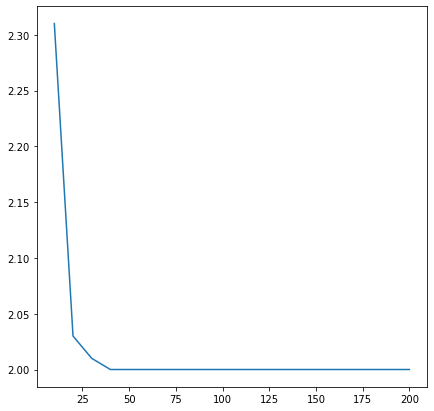

In [ ]:
p=0.34
means = [0]*20
n=[10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200]
for q in range(20):
    meanLongwwst=0 
    for i in range(100) :
        longestpath=0 
        path=0
        G = generate_fixed_gcc(n[q], p)
        nodes=[0,0]
        for h in range(G.number_of_nodes()):
            for w in range(h+1,G.number_of_nodes()):
                path=nx.shortest_path_length(G, source=h, target=w)
                if path>longestpath :
                    longestpath = path
                    nodes[0]=h
                    nodes[1]=w

        meanLongwwst = meanLongwwst + longestpath

    meanLongwwst = meanLongwwst/100
    means[q]=meanLongwwst
    
plt.plot(n,means)

#### Simulation Exercise #24

In [ ]:
n=50
p=0.34
meanSTh=0  

for j in range(100):
    G = generate_fixed_gcc(n, p)

    summ=0
    for i in range(50):
        summ = summ + nx.triangles(G,i)
    meanSTh = meanSTh + summ
meanSTh =meanSTh/100
meanSTh

10528.92

#### Simulation Exercise #25

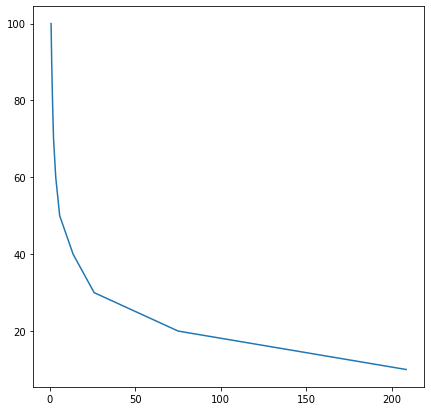

In [ ]:
means = [0]*10
n=[10,20,30,40,50,60,70,80,90,100]

for h in range(10):
    p=60./(n[h]*n[h])
    meanSTh=0  
    for j in range(100):
        G = generate_fixed_gcc(n[h], p)
        summ=0
        for i in range(n[h]):
            summ = summ + nx.triangles(G,i)
        meanSTh = meanSTh + summ
    meanSTh =meanSTh/100
    means[h] = meanSTh
plt.plot(means,n)

#### Simulation Exercise #26

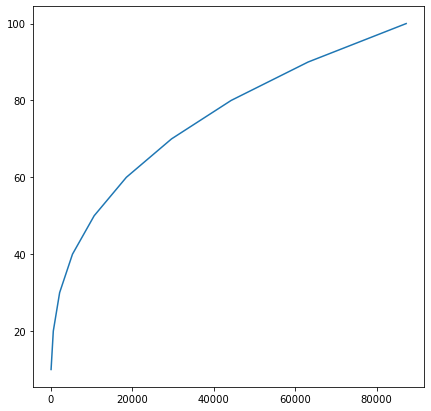

In [ ]:
means = [0]*10
n=[10,20,30,40,50,60,70,80,90,100]

for h in range(10):
    p=0.34
    meanSTh=0  
    for j in range(100):
        G = generate_fixed_gcc(n[h], p)
        summ=0
        for i in range(n[h]):
            summ = summ + nx.triangles(G,i)
        meanSTh = meanSTh + summ
    meanSTh =meanSTh/100
    means[h] = meanSTh
plt.plot(means,n)

#### Simulation Exercise #27

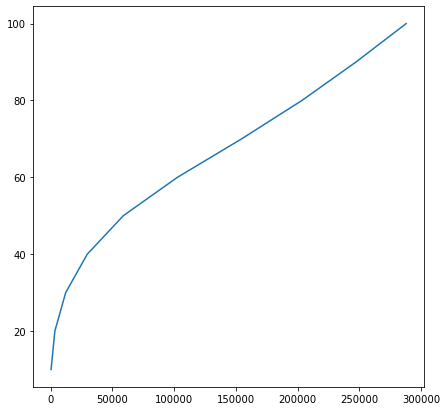

In [ ]:
means = [0]*10
n=[10,20,30,40,50,60,70,80,90,100]

for h in range(10):
    p=60./(n[h])
    meanSTh=0  
    for j in range(100):
        G = generate_fixed_gcc(n[h], p)
        summ=0
        for i in range(n[h]):
            summ = summ + nx.triangles(G,i)
        meanSTh = meanSTh + summ
    meanSTh =meanSTh/100
    means[h] = meanSTh
plt.plot(means,n)

#### Simulation Exercise #28

In [9]:
G = nx.karate_club_graph()
A = np.zeros((len(G.nodes()),len(G.nodes())))
D = np.zeros((len(G.nodes()),len(G.nodes())))
for i in range(len(G.nodes())):
    for j in range(len(G.nodes())):
        if j in G.neighbors(i) :
               A[i][j]=1
    D[i][i]=G.degree(i)
               
P=np.multiply(np.linalg.inv(D),A)
P2=np.multiply(P,P)
C=np.ones((len(G.nodes()),len(G.nodes())+1))*(-1)

for i in range(len(G.nodes())):
    C[i][0]=i
while 1 :
    rn=0
    rncout=0
    for j in range(len(G.nodes())):
        if(C[j][len(G.nodes())]!=-2):
            rn=rn+1
    #     making r
    R=np.zeros((rn,rn))
    summs=[0]*len(R)
    cnum=[0]*len(R)
    for h in range(rn):
        for w in range(rn):
            summ=0
            for k in range(len(G.nodes())):
                for a in range(len(G.nodes())):
                    if(C[a][len(G.nodes())]!=-2):
                        for b in range(len(G.nodes())):
                            if C[a][b]!=-1 :
                                cnum[rncout] = cnum[rncout] + 1
                                summs[rncout] = summs[rncout] + P[int(C[a][b])][k]
                if (cnum[w]!=0 and cnum[h]!=0):
                    sorat=(summs[h]/cnum[h]-summs[w]/cnum[w])**2
                summ = summ + sorat/G.degree(k)
                rncout=0
                
            R[h][w]=np.sqrt(summ)

    arr= R == R.min()
    node1=0
    node2=0
    flag=0
    for i in range(len(R)):
        if flag==0 :
            for j in range(len(R)):
                if arr[i][j] :
                    node1=i
                    node2=j
                    flag=1
                    break
        else :
            break
    
    for a in range(len(G.nodes())):
        if(C[a][len(G.nodes())]!=-2):
            C[a+node2][len(G.nodes())]=-2
            for b in range(len(G.nodes())):
                if C[a+node1][b]==-1 :
                    for s in range(len(G.nodes())):
                        if C[a+node2][s] !=-1 :
                            C[a+node1][b] = C[a+node2][s]
        
    


ValueError: ignored

#### Simulation Exercise #29

In [ ]:
G = nx.karate_club_graph()
A = np.zeros((len(G.nodes()),len(G.nodes())))
D = np.zeros((len(G.nodes()),len(G.nodes())))
for i in range(len(G.nodes())):
    for j in range(len(G.nodes())):
        if j in G.neighbors(i) :
               A[i][j]=1
    D[i][i]=G.degree(i)
               
P=np.multiply(np.linalg.inv(D),A)
P5=np.multiply(np.multiply(np.multiply(P,P),np.multiply(P,P)),P)
C=np.ones((len(G.nodes()),len(G.nodes())+1))*(-1)

for i in range(len(G.nodes())):
    C[i][0]=i
while 1 :
    rn=0
    rncout=0
    for j in range(len(G.nodes())):
        if(C[j][len(G.nodes())]!=-2):
            rn=rn+1
    #     making r
    R=np.zeros((rn,rn))
    summs=[0]*len(R)
    cnum=[0]*len(R)
    for h in range(rn):
        for w in range(rn):
            summ=0
            for k in range(len(G.nodes())):
                for a in range(len(G.nodes())):
                    if(C[a][len(G.nodes())]!=-2):
                        for b in range(len(G.nodes())):
                            if C[a][b]!=-1 :
                                cnum[rncout] = cnum[rncout] + 1
                                summs[rncout] = summs[rncout] + P[C[a][b]][k]
                sorat=(summs[h]/cnum[h]-summs[w]/cnum[w])**2
                summ = summ + sorat/G.degree(k)
                rncout=0
                
            R[h][w]=np.sqrt(summ)

    arr= R == R.min()
    node1=0
    node2=0
    flag=0
    for i in range(len(R)):
        if flag==0 :
            for j in range(len(R)):
                if arr[i][j] :
                    node1=i
                    node2=j
                    flag=1
                    break
        else :
            break
    
    for a in range(len(G.nodes())):
        if(C[a][len(G.nodes())]!=-2):
            C[a+node2][len(G.nodes())]=-2
            for b in range(len(G.nodes())):
                if C[a+node1][b]==-1 :
                    for s in range(len(G.nodes())):
                        if C[a+node2][s] !=-1 :
                            C[a+node1][b] = C[a+node2][s]
        
 

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices